In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import cdist
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

In [2]:
import os
os.chdir('/home/kipengui/openclassrooms_data_analyst/projet_6')

In [3]:
data = pd.read_csv('dataset_P6/notes.csv')

In [4]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


# Description des données

In [5]:
data.isna().any()

is_genuine      False
diagonal        False
height_left     False
height_right    False
margin_low      False
margin_up       False
length          False
dtype: bool

In [6]:
data.duplicated().any()

False

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    170 non-null    bool   
 1   diagonal      170 non-null    float64
 2   height_left   170 non-null    float64
 3   height_right  170 non-null    float64
 4   margin_low    170 non-null    float64
 5   margin_up     170 non-null    float64
 6   length        170 non-null    float64
dtypes: bool(1), float64(6)
memory usage: 8.3 KB


In [8]:
round(data.groupby('is_genuine').describe().T, 2)

is_genuine           False    True
diagonal     count   70.00  100.00
             mean   171.89  171.98
             std      0.30    0.31
             min    171.38  171.04
             25%    171.68  171.79
             50%    171.88  172.00
             75%    172.05  172.16
             max    173.01  172.75
height_left  count   70.00  100.00
             mean   104.23  103.95
             std      0.21    0.30
             min    103.78  103.23
             25%    104.08  103.74
             50%    104.22  103.92
             75%    104.38  104.14
             max    104.72  104.86
height_right count   70.00  100.00
             mean   104.15  103.78
             std      0.25    0.29
             min    103.44  103.14
             25%    103.98  103.56
             50%    104.17  103.76
             75%    104.28  103.97
             max    104.86  104.95
margin_low   count   70.00  100.00
             mean     5.28    4.14
             std      0.54    0.31
             min      3.82    3.54
             25%      4.95    3.90
             50%      5.26    4.08
             75%      5.70    4.38
             max      6.28    5.04
margin_up    count   70.00  100.00
             mean     3.33    3.06
             std      0.19    0.20
             min      2.98    2.27
             25%      3.18    2.94
             50%      3.34    3.07
             75%      3.45    3.19
             max      3.68    3.53
length       count   70.00  100.00
             mean   111.66  113.21
             std      0.68    0.38
             min    109.97  111.76
             25%    111.27  113.00
             50%    111.76  113.21
             75%    111.98  113.50
             max    113.64  113.98

In [9]:
data['is_genuine'].value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

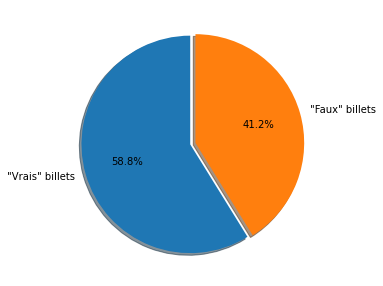

In [10]:
labels = '\"Vrais" billets', '\"Faux" billets'
sizes = [data.is_genuine[data.is_genuine==True].count(), data.is_genuine[data.is_genuine==False].count()]
explode = (0.05, 0)

plt.figure(figsize=(7,5))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.savefig('pie_real_false_bills.jpg')
plt.show()

### Analyse univariée

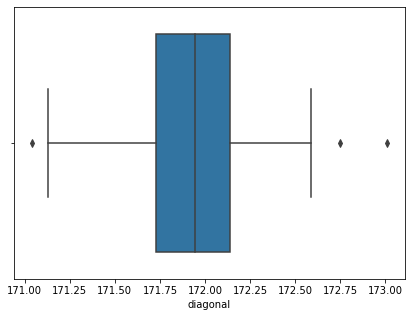

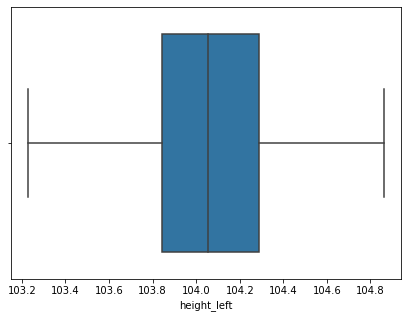

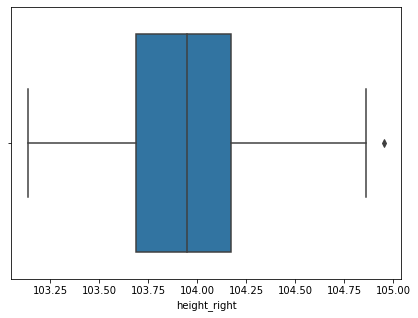

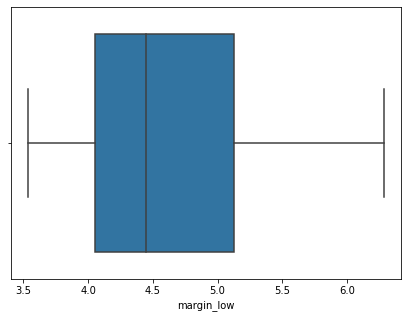

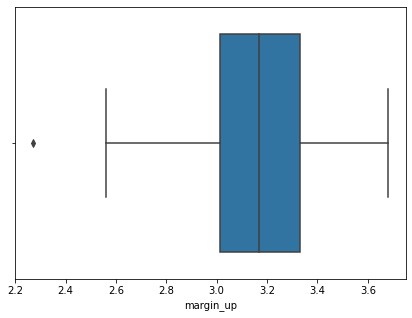

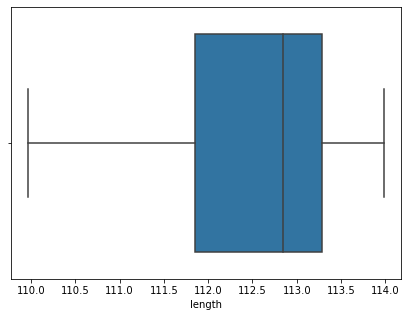

In [11]:
for i in data.select_dtypes('float'):
    plt.figure(figsize=(7, 5))
    sns.boxplot(x=i, data=data)
    plt.savefig('univariate_analysis.jpg')
    plt.show()

### Analyse bivariée

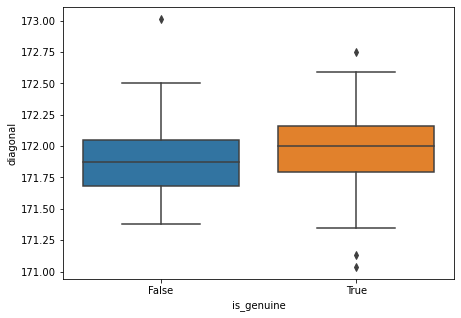

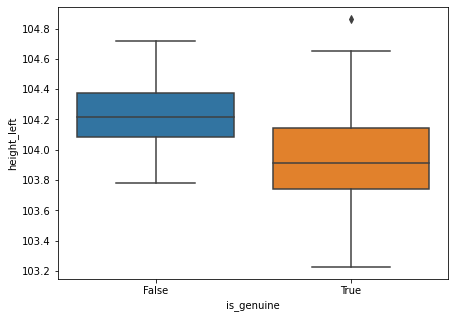

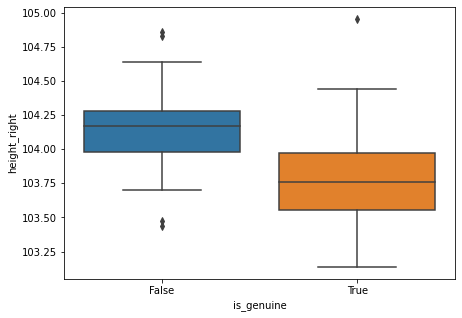

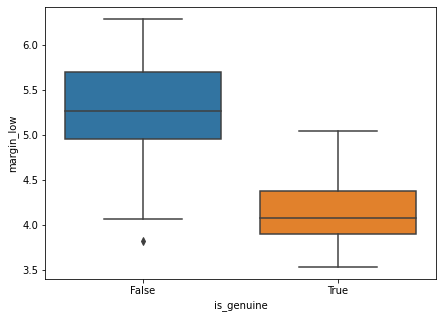

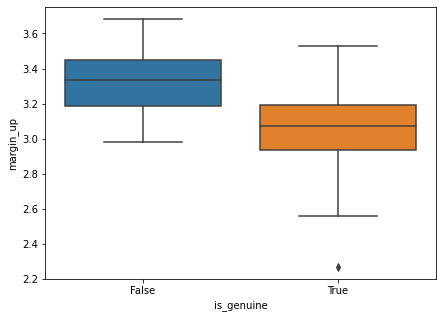

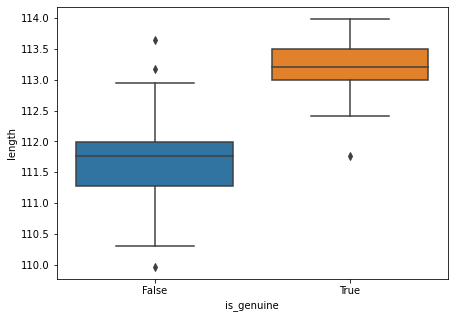

In [12]:
for i in data.select_dtypes('float'):
    plt.figure(figsize=(7, 5))
    sns.boxplot( x='is_genuine', y=i, data=data)
    plt.savefig('bivariate_analysis.jpg')
    plt.show()

In [13]:
corr = data.corr()
corr

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.139223,-0.461730,-0.551309,-0.800111,-0.582801,0.825743
diagonal,0.139223,1.000000,0.319584,0.220418,-0.181020,-0.027366,0.080295
height_left,-0.461730,0.319584,1.000000,0.734390,0.424530,0.324788,-0.421387
height_right,-0.551309,0.220418,0.734390,1.000000,0.509375,0.366918,-0.417021
margin_low,-0.800111,-0.181020,0.424530,0.509375,1.000000,0.171113,-0.637352
margin_up,-0.582801,-0.027366,0.324788,0.366918,0.171113,1.000000,-0.525284
length,0.825743,0.080295,-0.421387,-0.417021,-0.637352,-0.525284,1.000000


/tmp/ipykernel_610/1886794381.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype= np.bool))


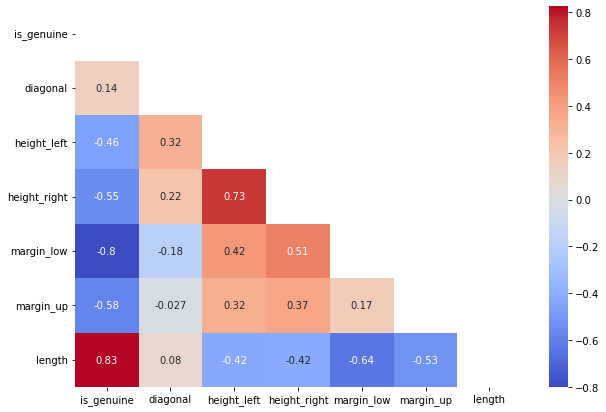

In [14]:
# heatmap


plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(corr, dtype= np.bool))
sns.heatmap(corr, mask=mask, cmap= 'coolwarm', annot=True)
plt.savefig('heatmap_correlation.jpg')
plt.show()

In [15]:
df_true = data[data['is_genuine']==True]
df_false = data[data['is_genuine']==False]

In [16]:
from scipy.stats import ttest_ind
def t_test(col):
    from scipy.stats import ttest_ind
    alpha = 0.05
    stat, p_val = ttest_ind(df_true.sample(df_false.shape[0])[col], df_false[col])
    if p_val < alpha:
        return 'Cette variable influe sur le statut du billet !!!'
    else:
        return 'Cette variable n\'a aucune influence sur le statut du billet !!!'
        

In [17]:
for col in data.select_dtypes('float'):
    print(f'{col :-<50} {t_test(col)}')

diagonal------------------------------------------ Cette variable influe sur le statut du billet !!!
height_left--------------------------------------- Cette variable influe sur le statut du billet !!!
height_right-------------------------------------- Cette variable influe sur le statut du billet !!!
margin_low---------------------------------------- Cette variable influe sur le statut du billet !!!
margin_up----------------------------------------- Cette variable influe sur le statut du billet !!!
length-------------------------------------------- Cette variable influe sur le statut du billet !!!


In [18]:
real_bills = data[data['is_genuine'] == True]
false_bills = data[data['is_genuine'] == False]

In [19]:
from scipy import stats

In [20]:
# Test de Student
def stats_test(cols_):
    for i in data.select_dtypes('float'):
        alpha = 0.05
        stat, p_val = ttest_ind(real_bills.sample(false_bills.shape[0])[cols_], false_bills[cols_])
        if p_val < alpha:
            return 'Cette variable a une influence sur l\'authentification du billet.'
        else:
            return 'Cette variable n\'a aucune influence sur l\'authentification du billet !!!'

In [21]:
for cols_ in data.select_dtypes('float'):
    print(f'{cols_ :-<50}{stats_test(cols_)}')

diagonal------------------------------------------Cette variable n'a aucune influence sur l'authentification du billet !!!
height_left---------------------------------------Cette variable a une influence sur l'authentification du billet.
height_right--------------------------------------Cette variable a une influence sur l'authentification du billet.
margin_low----------------------------------------Cette variable a une influence sur l'authentification du billet.
margin_up-----------------------------------------Cette variable a une influence sur l'authentification du billet.
length--------------------------------------------Cette variable a une influence sur l'authentification du billet.


In [22]:
for cols_ in data.select_dtypes('float'):
    # H0: tous les billets (vrais comme faux) ont une diagonale similaire
    ttest1 = stats.ttest_ind(real_bills['diagonal'], false_bills['diagonal'])
    
    # H0: tous les billets (vrais comme faux) ont une hauteur gauche similaire
    ttest2 = stats.ttest_ind(real_bills['height_left'], false_bills['height_left'])
    
    # H0: tous les billets (vrais comme faux) ont une hauteur droite similaire
    ttest3 = stats.ttest_ind(real_bills['height_right'], false_bills['height_right'])
    
    # H0: tous les billets (vrais comme faux) ont une marge basse similaire
    ttest4 = stats.ttest_ind(real_bills['margin_low'], false_bills['margin_low'])
    
    # H0: tous les billets (vrais comme faux) ont une marge haute similaire
    ttest5 = stats.ttest_ind(real_bills['margin_up'], false_bills['margin_up'])

    # H0: tous les billets (vrais comme faux) ont une longueur similaire
    ttest6 = stats.ttest_ind(real_bills['length'], false_bills['length'])
    
print(ttest1, '\n', ttest2, '\n' , ttest3, '\n', ttest4, '\n', ttest5, '\n', ttest6)

Ttest_indResult(statistic=1.8222865515506024, pvalue=0.07018967008887296) 
 Ttest_indResult(statistic=-6.746974258787215, pvalue=2.3342002888499904e-10) 
 Ttest_indResult(statistic=-8.564989194564754, pvalue=6.665246409290165e-15) 
 Ttest_indResult(statistic=-17.288623485750918, pvalue=3.940145276272617e-39) 
 Ttest_indResult(statistic=-9.295866009945723, pvalue=7.567386063614238e-17) 
 Ttest_indResult(statistic=18.975090930566722, pvalue=1.2348226459862946e-43)


In [23]:
alpha = 0.05

In [24]:
# H0: tous les billets (vrais comme faux) ont une diagonale similaire
print(f'La P-value étant supérieure à {alpha}, la différence de la diagonale des billets n\'est pas statistiquement',
      'significative'), '\n',

# H0: tous les billets (vrais comme faux) ont une hauteur gauche similaire
print(f'La P-value étant inférieure à {alpha}, la différence de la hauteur gauche des billets est statistiquement', 'significative'), '\n',

# H0: tous les billets (vrais comme faux) ont une hauteur droite similaire
print(f'La P-value étant inférieure à {alpha}, la différence de la hauteur droite des billets est statistiquement significative'), '\n',

# H0: tous les billets (vrais comme faux) ont une marge basse similaire
print(f'La P-value étant inférieure à {alpha}, la différence de la marge basse des billets est statistiquement significative'), '\n',

# H0: tous les billets (vrais comme faux) ont une marge haute similaire
print(f'La P-value étant inférieure à {alpha}, la différence de la marge haute des billets est statistiquement significative'), '\n',

# H0: tous les billets (vrais comme faux) ont une longueur similaire
print(f'La P-value étant inférieure à {alpha}, la différence de la longueur des billets est statistiquement significative')

La P-value étant supérieure à 0.05, la différence de la diagonale des billets n'est pas statistiquement significative
La P-value étant inférieure à 0.05, la différence de la hauteur gauche des billets est statistiquement significative
La P-value étant inférieure à 0.05, la différence de la hauteur droite des billets est statistiquement significative
La P-value étant inférieure à 0.05, la différence de la marge basse des billets est statistiquement significative
La P-value étant inférieure à 0.05, la différence de la marge haute des billets est statistiquement significative
La P-value étant inférieure à 0.05, la différence de la longueur des billets est statistiquement significative


# Analyse en composantes principales

In [25]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(7,6))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)


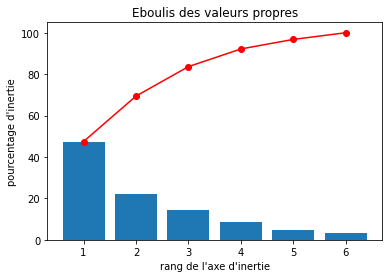

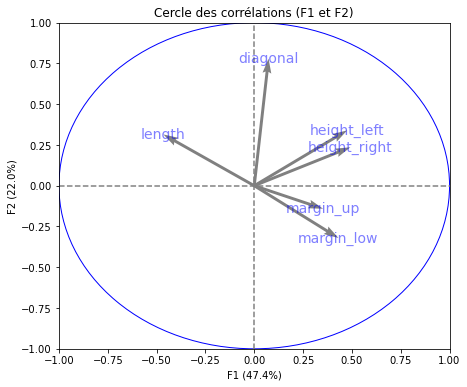

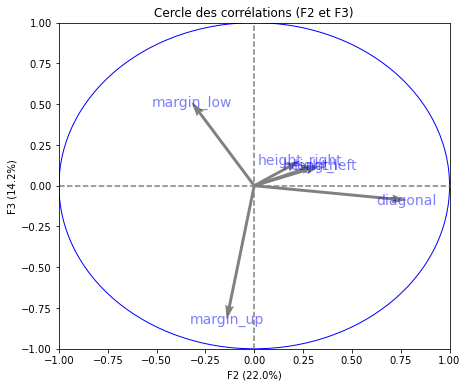

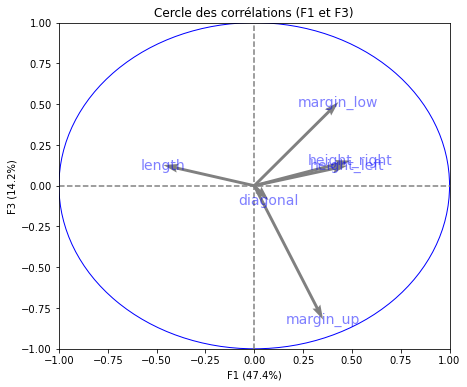

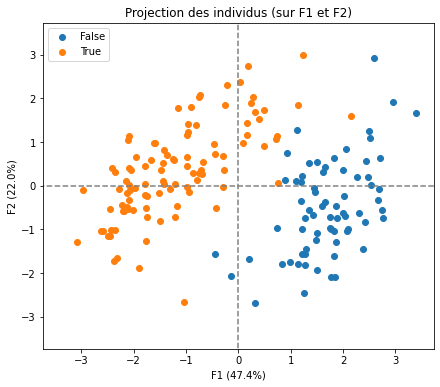

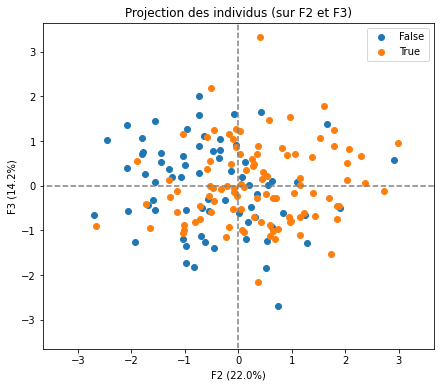

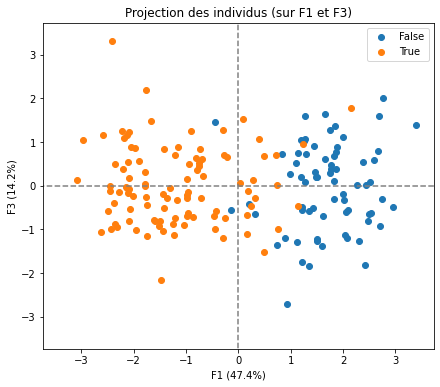

In [26]:
n_comp = 6

# préparation des données pour l'ACP
X = data.drop(['is_genuine'], axis=1)
features = X.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(1,2),(0,2)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(1,2),(0,2)], illustrative_var = data['is_genuine'])

plt.show()

In [27]:
# valeurs standardisées
df_xscld = pd.DataFrame(X_scaled, columns= X.columns)
df_xscld.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777


In [28]:
matrix = df_xscld.cov()
matrix

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.005917,0.321475,0.221722,-0.182092,-0.027527,0.080770
height_left,0.321475,1.005917,0.738736,0.427042,0.326709,-0.423881
height_right,0.221722,0.738736,1.005917,0.512389,0.369089,-0.419488
margin_low,-0.182092,0.427042,0.512389,1.005917,0.172125,-0.641123
margin_up,-0.027527,0.326709,0.369089,0.172125,1.005917,-0.528392
length,0.080770,-0.423881,-0.419488,-0.641123,-0.528392,1.005917


In [29]:
print(pca.explained_variance_ratio_)

[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


In [30]:
X_projected = pca.transform(X_scaled)
X_projected

array([[ 2.15363875,  1.59970945,  1.78745079,  2.43346523,  0.69968952,
        -1.26770217],
       [-2.11041589, -0.52603892,  0.54256277,  0.34454951,  0.0674404 ,
        -0.54460079],
       [-1.97315242, -0.04810178,  0.85871563,  0.37481231, -0.4248861 ,
         0.08048667],
       ...,
       [ 2.06724502,  0.84560244, -0.61028227, -1.71417169,  0.1169579 ,
        -0.50433787],
       [ 0.73925685, -0.97296457, -1.35977212, -0.19173617, -0.24355701,
         0.21142914],
       [ 1.50499242, -1.07972486,  0.18888855, -1.34755225, -0.2891493 ,
        -0.06034599]])

In [31]:
X_projected = pd.DataFrame({'composante_1' : X_projected[:,0],
                           'composante_2' : X_projected[:,1]},
                          columns= ['composante_1', 'composante_2'])

X_projected.head()

,composante_1,composante_2
0,2.153639,1.599709
1,-2.110416,-0.526039
2,-1.973152,-0.048102
3,-2.059795,-0.089105
4,-2.403180,0.412170


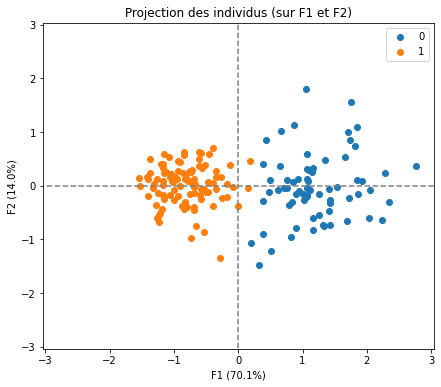

In [32]:
n_clust = 2

X_scaled = preprocessing.StandardScaler().fit_transform(X)
km = KMeans(n_clusters= n_clust)
km.fit(X)

clusters = km.labels_

# Affichage du clustering par projection des individus sur le prmeier plan factoriel
pca = decomposition.PCA(n_components=6).fit(X)
X1_projected = pca.transform(X)
display_factorial_planes(X1_projected, n_clust, pca, [(0,1)],illustrative_var=clusters)

In [33]:
x1 = X1_projected
y1 = data['is_genuine']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x1, y1, train_size = 0.8 ,random_state = 1)

# K-Means

In [36]:
km = KMeans(n_clusters=2).fit(xtrain, ytrain)
model = km.predict(xtest)
model = pd.DataFrame(model, index=ytest.index, columns=['cluster'])
model.head()

,cluster
48,1
91,1
19,1
35,1
164,0


In [37]:
df_ytest = pd.DataFrame(ytest)
df_xtest = pd.DataFrame(X_projected, index=df_ytest.index, columns=['composante_1', 'composante_2'])
test_bills = pd.concat([model, df_xtest], axis=1)
df_cluster_bills = pd.concat([test_bills, df_ytest], axis = 1)
df_cluster_bills.head()

,cluster,composante_1,composante_2,is_genuine
48,1,-1.172986,-0.455789,True
91,1,-0.814090,1.380959,True
19,1,-0.753444,0.282418,True
35,1,-0.295310,-0.034889,True
164,0,1.271100,-1.804598,False


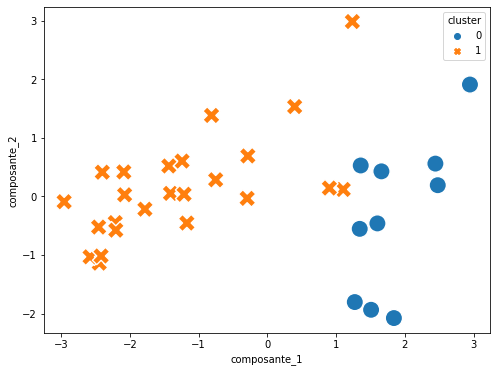

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_cluster_bills, x='composante_1', y='composante_2', hue='cluster', style='cluster', s=300)
plt.show()

### matrice de confusion

In [39]:
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

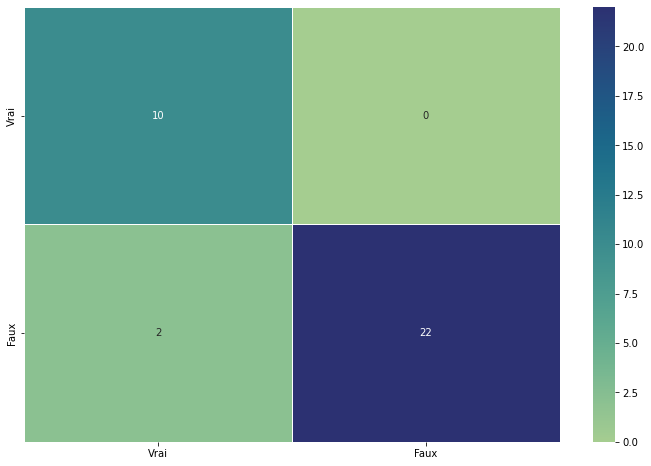

In [40]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(df_cluster_bills['cluster'], df_cluster_bills['is_genuine'])
sns.heatmap(conf_matrix, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"],cmap='crest', linewidths = 1)

### KNN

In [41]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

In [42]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)
knn.score(xtrain, ytrain)

print('Test Score :', knn.score(xtest, ytest))
print('Train Score :', knn.score(xtrain, ytrain))

Test Score : 0.9705882352941176
Train Score : 0.9926470588235294


In [43]:
#prédiction des tests
knn.predict(xtest)
pd.DataFrame(knn.predict(xtest))

,0
0,True
1,True
2,True
3,True
4,False
5,True
6,False
7,True
8,False
9,False


In [44]:
# % d'erreur
error = 1 - knn.score(xtest, ytest)
print('Erreur: %f' % error)

Erreur: 0.029412


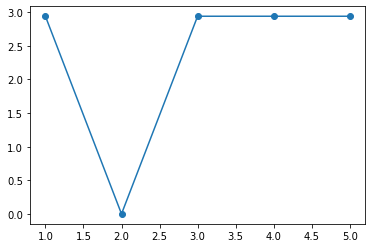

In [45]:
errors = []
for k in range(1,6):
    knn = KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(1,6), errors, 'o-')
plt.show()

### matrice de confusion avec k=2

<AxesSubplot:>

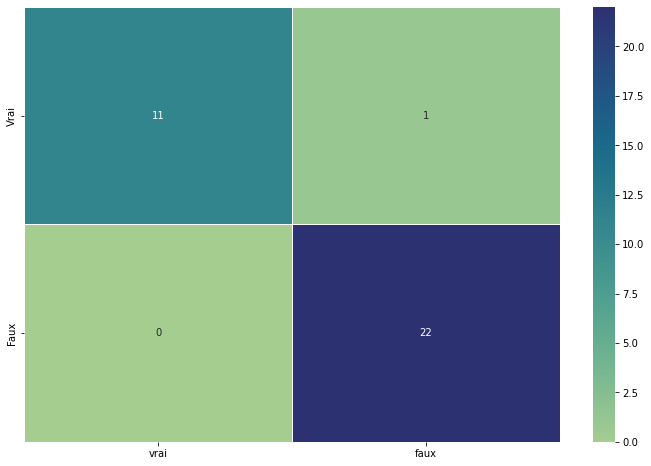

In [46]:
plt.figure(figsize=(12,8))
conf_matrix_2 = confusion_matrix(ytest, knn.predict(xtest))
sns.heatmap(conf_matrix_2, annot=True, xticklabels=["vrai","faux"], yticklabels=["Vrai","Faux"], linewidths = 1, cmap='crest')

# Régression logistique

In [47]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
prediction = lr.predict(xtest)
pd.DataFrame(prediction)

,0
0,True
1,True
2,True
3,True
4,False
5,True
6,False
7,True
8,False
9,True


### efficacité du test

In [48]:
score = lr.score(xtest, ytest)
print((score)*100,'%')

94.11764705882352 %


In [49]:
from sklearn import metrics
cm = metrics.confusion_matrix(ytest, prediction)
print(cm)

[[10  2]
 [ 0 22]]


<AxesSubplot:>

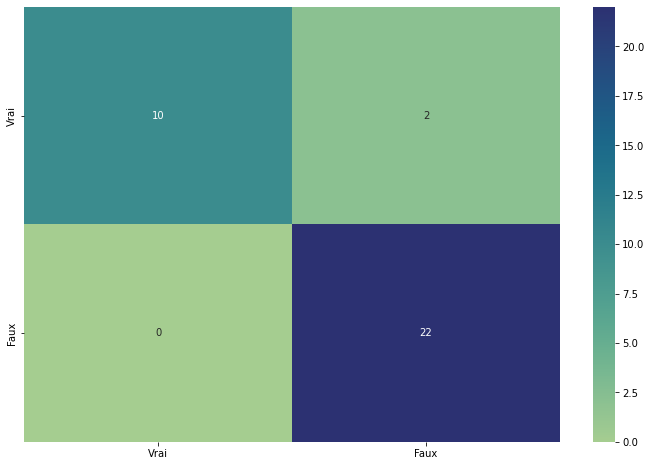

In [50]:
plt.figure(figsize=(12,8))
conf_matrix_3 = confusion_matrix(ytest, prediction)
sns.heatmap(conf_matrix_3, annot=True, xticklabels=["Vrai","Faux"], yticklabels=["Vrai","Faux"], cmap='crest')

### programme de prédiction

In [51]:
# fichier témoin
test = pd.read_csv('P6_mavatiku_kemy/example.csv')
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc


# On récupère les features d'un côté...
X = data.iloc[:,1:]
X=X.values
# et les labels de l'autre
y = data.iloc[:,0] 
y=y.values

lr = LogisticRegression()

lr.fit(X,y)

classes_predites=lr.predict(X)

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif

In [54]:
prediction = pd.DataFrame(lr.predict(test.set_index('id')))
probabilite = pd.DataFrame(lr.predict_proba(test.set_index('id')))

In [55]:
prediction

,0
0,False
1,False
2,False
3,True
4,True


In [56]:
probabilite

,0,1
0,0.959973,0.040027
1,0.990864,0.009136
2,0.972259,0.027741
3,0.122606,0.877394
4,0.003608,0.996392


In [57]:
def verif(test):
    i=0
    columns = ['authentification']
    df_results = pd.DataFrame(columns=columns)
    for i in test.index:
        if float(lr.predict_proba(test[test.index==i].drop(columns='id'))[:,0])>0.5:
            df_results=df_results.append({'authentification':'fausse'},ignore_index=True)
            print("La probabilité que le billet n° {} soit faux est de {} %".format(i+1, round((float(lr.predict_proba(test[test.index==i].drop(columns='id'))[:,0])*100),2)))
        else :
            print("La probabilité que le billet n° {} soit vraie est de {} %".format(i+1,round((float(lr.predict_proba(test[test.index==i].drop(columns='id'))[:,1])*100),2)))
            df_results=df_results.append({'authentification':'vraie'},ignore_index=True)
    df_results=df_results.set_index(test.id,drop=True)
    print("\n", df_results)

In [58]:
verif(test)

La probabilité que le billet n° 1 soit faux est de 96.0 %
La probabilité que le billet n° 2 soit faux est de 99.09 %
La probabilité que le billet n° 3 soit faux est de 97.23 %
La probabilité que le billet n° 4 soit vraie est de 87.74 %
La probabilité que le billet n° 5 soit vraie est de 99.64 %

     authentification
id                  
A_1           fausse
A_2           fausse
A_3           fausse
A_4            vraie
A_5            vraie
